In [79]:
import matplotlib.pyplot as plt
import pandas
import pandas as pd

# Data Loading

In [80]:
# import from csv
df = pandas.read_csv('./dataset/places_to_eat_in_the_jogja_region.csv')
df

,Nama Restoran,Preferensi Makanan,Lokasi Restoran,Harga Rata-Rata Makanan di Toko (Rp),Rating Toko,Jenis Suasana,Toko Sering Diskon (Ya/Tidak),Variasi Makanan,Pelayanan Khusus Pasangan (Ya/Tidak),Entertainment,Keramaian Restoran,Disajikan atau Ambil Sendiri,All You Can Eat atau Ala Carte
0,"Mie Bandung Chinese Food, Ngampilan",Chinese,3.23 km,39000,4.7,Santai,Tidak,"Bakmie, Aneka nasi, Chinese",Tidak,3,3,Disajikan,Ala Carte
1,"Soto Tauco Pekalongan Bu Iswi, Jalan Bimokurdo...",Indonesia,3.01 km,19000,3.7,Santai,Tidak,"Bakso & soto, Cepat saji, Minuman",Tidak,2,2,Disajikan,Ala Carte
2,"Spesial Bakso Pak Jum Balai Kota, Umbulharjo",Indonesia,1.44 km,18000,3.6,Santai,Tidak,"Bakso & soto, Jajanan, Minuman",Tidak,2,2,Disajikan,Ala Carte
3,Soto Ayam Kampung Dan Soto Daging Sapi Pak Ben,Indonesia,0.83 km,22000,3.8,Santai,Tidak,"Bakso & soto, Minuman",Tidak,1,2,Disajikan,Ala Carte
4,Toba Tabo,Chinese,2.13 km,40000,4.7,Santai,Tidak,"Cepat saji, Bakmie, Chinese",Tidak,1,3,Disajikan,Ala Carte
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,OMAH STEAK AND CHICKEN,Western,2.31 km,34000,4.7,Santai,Tidak,Western,Tidak,3,2,Disajikan,Ala Carte
287,"Pondok Cabe Bistro, C Simanjuntak",Western,4.25 km,35000,4.5,Santai,Tidak,"Western, Pizza & pasta, Rice, Chicken & duck, ...",Tidak,4,3,Disajikan,Ala Carte
288,Waroeng Spaghetti Balapan,Western,3.25 km,25000,4.7,Santai,Ya,"Western, Snacks",Tidak,2,2,Disajikan,Ala Carte
289,"Burgerax, Patangpuluhan",Western,4.59 km,38000,4.7,Santai,Tidak,"Western, Snacks, Fast food",Tidak,4,3,Disajikan,Ala Carte


# Data Preprocessing

## Data Information Before Preprocessing

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Nama Restoran                         291 non-null    object 
 1   Preferensi Makanan                    291 non-null    object 
 2   Lokasi Restoran                       291 non-null    object 
 3   Harga Rata-Rata Makanan di Toko (Rp)  291 non-null    int64  
 4   Rating Toko                           291 non-null    float64
 5   Jenis Suasana                         291 non-null    object 
 6   Toko Sering Diskon (Ya/Tidak)         291 non-null    object 
 7   Variasi Makanan                       291 non-null    object 
 8   Pelayanan Khusus Pasangan (Ya/Tidak)  291 non-null    object 
 9   Entertainment                         291 non-null    int64  
 10  Keramaian Restoran                    291 non-null    int64  
 11  Disajikan atau Ambi

## Column Renaming

In [82]:

df.rename(columns={
    'All You Can Eat atau Ala Carte ': 'allYouCanEat/alaCarte',
    'Harga Rata-Rata Makanan di Toko (Rp)': 'avgPrice',
    'Rating Toko': 'Rating'
}, inplace=True)


## Data Type Conversion

In [83]:
df['rating'] = pd.to_numeric(df['Rating'], errors='coerce')

## Konversi Variasi Makanan Ke Numerik

In [84]:
data = []
for i in range(len(df['Variasi Makanan'])):
    for j in df['Variasi Makanan'][i].split(','):
        if j.strip(' ') not in data:
            data.append(j)

In [85]:
# remove duplicate data
data = list(dict.fromkeys(data))


In [86]:
data

['Bakmie',
 ' Aneka nasi',
 ' Chinese',
 'Bakso & soto',
 ' Cepat saji',
 ' Minuman',
 ' Jajanan',
 'Cepat saji',
 'Chicken & duck',
 ' Beverages',
 ' Pizza & pasta',
 ' Coffee',
 ' Rice',
 ' Noodles',
 ' Western',
 ' Japanese',
 ' Martabak',
 'Chinese',
 ' Ayam & bebek',
 'Japanese',
 ' Fast food',
 ' Snacks',
 ' Sweets',
 'Minuman',
 'Pizza & pasta',
 ' Bakery',
 'Rice',
 'Seafood',
 'Snacks',
 'Western',
 ' Korean',
 'Coffee',
 'Fast food',
 ' Barat',
 ' Indian',
 'Aneka nasi',
 'Beverages',
 'Jajanan',
 ' Sate',
 'Sweets',
 'Ayam & bebek',
 'Bakery',
 ' Middle Eastern',
 'Barat',
 'Sate',
 ' Korea']

In [87]:
for i in range(len(df['Variasi Makanan'])):
    # replace df['Variasi Makanan'][i] with numeric value
    d = len(df['Variasi Makanan'][i].split(','))
    df['Variasi Makanan'][i] = d

C:\Users\Rico Fitra Pratama\AppData\Local\Temp\ipykernel_33392\120778997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Variasi Makanan'][i] = d
C:\Users\Rico Fitra Pratama\AppData\Local\Temp\ipykernel_33392\120778997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Variasi Makanan'][i] = d
C:\Users\Rico Fitra Pratama\AppData\Local\Temp\ipykernel_33392\120778997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Va

# Data Analysis

## Persentase Harga Rata-rata Per Menu Makanan

In [88]:
# Average Price Statistics
df['avgPrice'].describe()

count       291.000000
mean      38766.323024
std       28509.896041
min       10000.000000
25%       22000.000000
50%       31000.000000
75%       44500.000000
max      330000.000000
Name: avgPrice, dtype: float64

In [89]:
"""
Price Range Classification
A: < 20.000
B: <50.000
C: 100.000
D:100.000
"""

'\nPrice Range Classification\nA: < 20.000\nB: <50.000\nC: 100.000\nD:100.000\n'

In [90]:
a = df[df['avgPrice'] < 20000].count()['avgPrice']
b = df[(df['avgPrice'] >= 20000) & (df['avgPrice'] < 50000)].count()['avgPrice']
c = df[(df['avgPrice'] >= 50000) & (df['avgPrice'] < 100000)].count()['avgPrice']
d = df[df['avgPrice'] >= 100000].count()['avgPrice']

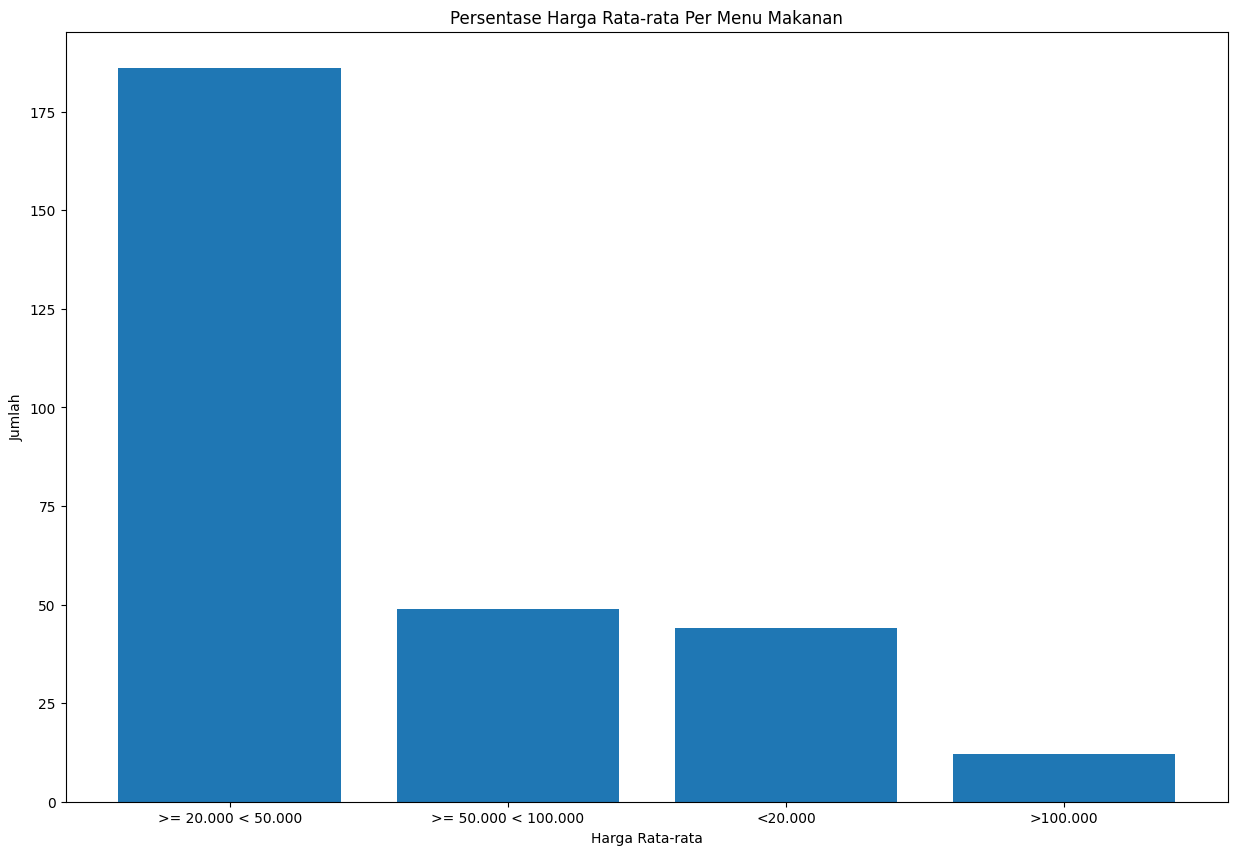

In [91]:
# Bar Plot make it larger
fig, ax = plt.subplots(figsize=(15, 10))
sorted_data = sorted([a, b, c, d], reverse=True)
x_labels = ['<20.000', '>= 20.000 < 50.000', '>= 50.000 < 100.000', '>100.000']
sorted_x_labels = [label for _, label in sorted(zip(data, x_labels))]
ax.bar(sorted_x_labels, sorted_data)
ax.set_title('Persentase Harga Rata-rata Per Menu Makanan')
ax.set_xlabel('Harga Rata-rata')
ax.set_ylabel('Jumlah')
plt.show()

In [92]:
print(sorted_data), print(sorted_x_labels)

[186, 49, 44, 12]
['>= 20.000 < 50.000', '>= 50.000 < 100.000', '<20.000', '>100.000']


(None, None)

In [93]:
a, b, c, d

(49, 186, 44, 12)

## Persentase Jenis Makanan

In [94]:
# Jenis Makanan Statistics
df['Preferensi Makanan'].describe()

count         291
unique          5
top       Western
freq           91
Name: Preferensi Makanan, dtype: object

<Axes: ylabel='count'>

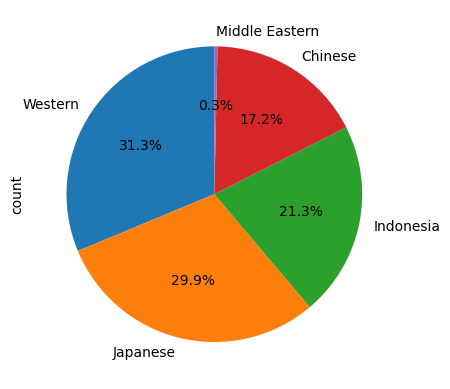

In [95]:
# Pie Chart
df['Preferensi Makanan'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=False, startangle=90)

In [96]:
df['Preferensi Makanan'].value_counts()

Preferensi Makanan
Western           91
Japanese          87
Indonesia         62
Chinese           50
Middle Eastern     1
Name: count, dtype: int64

## Perbandingan Jenis Makanan & Rating

In [97]:
# average rating per jenis makanan and plot using pie chart
data = {
    "Chinese": 0.0,
    "Indonesia": 0.0,
    "Western": 0.0,
    "Japanese": 0.0,
    "Middle Eastern": 0.0
}

for i in df['Preferensi Makanan'].unique().tolist():
    data[i] = df[df['Preferensi Makanan'] == i]['Rating'].mean()

# Sort data
data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))



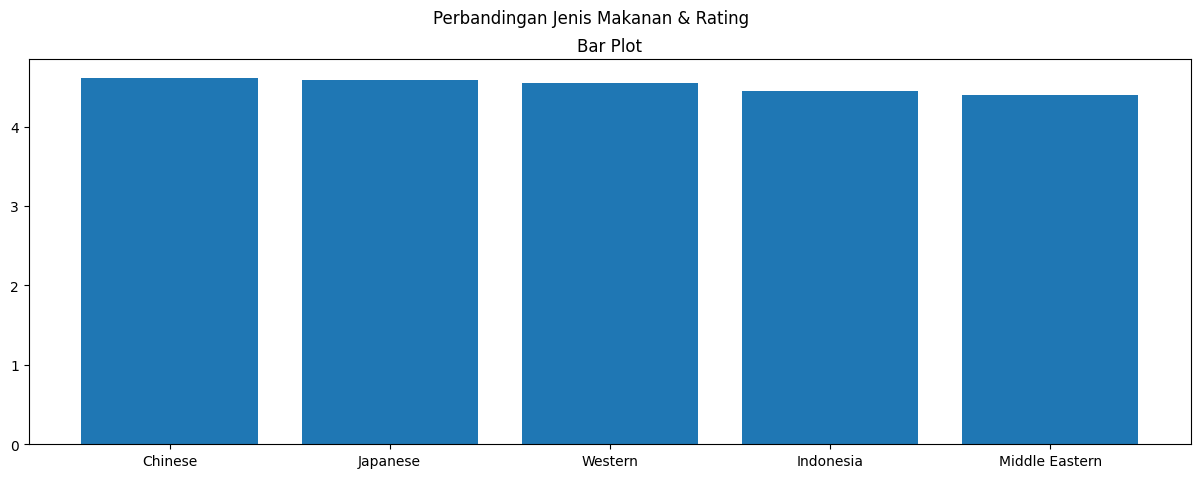

In [98]:
# plot menggunakan pie chart, dan bar plot dalam satu figure
fig, axes = plt.subplots(figsize=(15, 5))
fig.suptitle('Perbandingan Jenis Makanan & Rating')
axes.bar(data.keys(), data.values())
axes.set_title('Bar Plot')
plt.show()


In [99]:
data

{'Chinese': 4.6160000000000005,
 'Japanese': 4.580459770114942,
 'Western': 4.55054945054945,
 'Indonesia': 4.443548387096775,
 'Middle Eastern': 4.4}

In [100]:
# cheapest chinese restaurant
chin_res = df[df['Preferensi Makanan'] == 'Chinese'].sort_values(by=['avgPrice', 'rating']).head(10)
chin_res

,Nama Restoran,Preferensi Makanan,Lokasi Restoran,avgPrice,Rating,Jenis Suasana,Toko Sering Diskon (Ya/Tidak),Variasi Makanan,Pelayanan Khusus Pasangan (Ya/Tidak),Entertainment,Keramaian Restoran,Disajikan atau Ambil Sendiri,All You Can Eat atau Ala Carte,rating
152,"Twisted Noodle, Gondokusuman",Chinese,3.54 km,12000,4.6,Santai,Tidak,2,Ya,2,2,Disajikan,Ala Carte,4.6
67,"Kedai Jagoan Moy-Moy, Tamsis",Chinese,1.32 km,12000,4.7,Santai,Tidak,2,Tidak,4,2,Disajikan,Ala Carte,4.7
233,Bubur Ayam Bang Opik,Chinese,1.52 km,18000,4.5,Santai,Tidak,3,Tidak,3,1,Disajikan,Ala Carte,4.5
265,"Mie Surabaya Pak Joko, Gedongkuning Selatan",Chinese,1.62 km,18000,4.7,Santai,Tidak,3,Tidak,4,3,Disajikan,Ala Carte,4.7
8,"Nasi Goreng Gemilang, Gedongkuning",Chinese,1.97 km,19000,4.7,Santai,Ya,1,Tidak,3,2,Disajikan,Ala Carte,4.7
223,"Mie Kita Orang, Pasar Kranggan Lantai 2",Chinese,4.14 km,20000,4.2,Santai,Tidak,2,Tidak,4,3,Disajikan,Ala Carte,4.2
74,"Rm & Seafood 99, Sorowajan",Chinese,2.91 km,22000,4.2,Santai,Ya,3,Tidak,2,2,Disajikan,Ala Carte,4.2
273,"Oase Cafe & Coffe, Mergangsan",Chinese,1.3 km,22000,4.6,Santai,Tidak,3,Tidak,2,2,Disajikan,Ala Carte,4.6
35,"Vegan Cafe Black Forest, Brontokusuman",Chinese,2.25 km,22000,4.7,Santai,Tidak,3,Tidak,2,3,Disajikan,Ala Carte,4.7
182,Kedai Liang Xin,Chinese,4.62 km,22000,4.7,Santai,Tidak,2,Tidak,1,2,Disajikan,Ala Carte,4.7


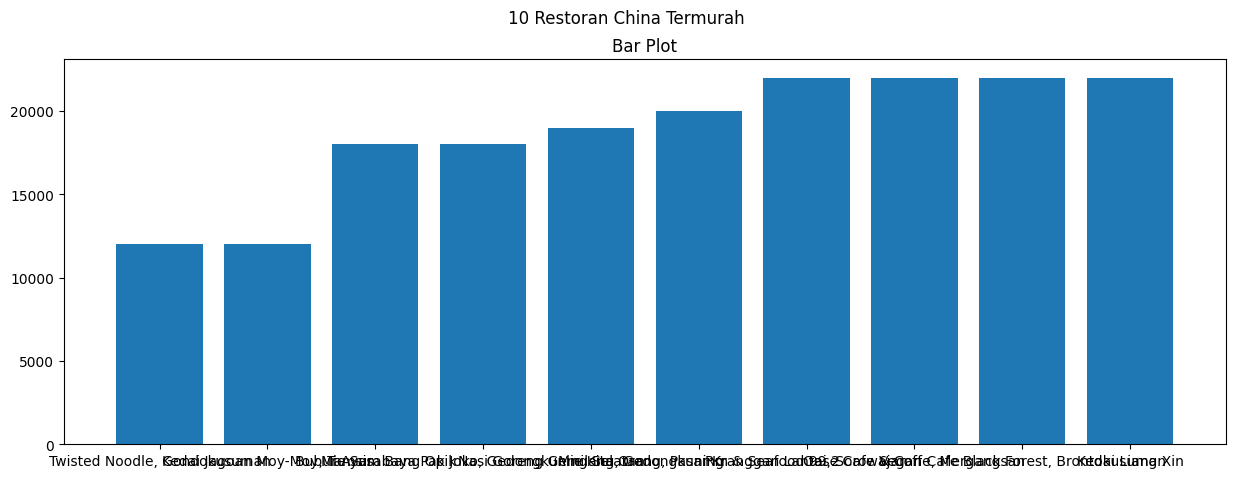

In [101]:
# plot chin_res bar plot
fig, axes = plt.subplots(figsize=(15, 5))
fig.suptitle('10 Restoran China Termurah')
axes.bar(chin_res['Nama Restoran'], chin_res['avgPrice'])
axes.set_title('Bar Plot')
plt.show()

In [102]:
# Ambil harga makanan khas Indonesia under 20 rb
df[(df['Preferensi Makanan'] == 'Indonesia') & (df['avgPrice'] < 20000)]

,Nama Restoran,Preferensi Makanan,Lokasi Restoran,avgPrice,Rating,Jenis Suasana,Toko Sering Diskon (Ya/Tidak),Variasi Makanan,Pelayanan Khusus Pasangan (Ya/Tidak),Entertainment,Keramaian Restoran,Disajikan atau Ambil Sendiri,All You Can Eat atau Ala Carte,rating
1,"Soto Tauco Pekalongan Bu Iswi, Jalan Bimokurdo...",Indonesia,3.01 km,19000,3.7,Santai,Tidak,3,Tidak,2,2,Disajikan,Ala Carte,3.7
2,"Spesial Bakso Pak Jum Balai Kota, Umbulharjo",Indonesia,1.44 km,18000,3.6,Santai,Tidak,3,Tidak,2,2,Disajikan,Ala Carte,3.6
5,"Sop Ayam Klaten, Mantrijeron",Indonesia,3.1 km,16000,4.4,Santai,Tidak,3,Tidak,4,3,Disajikan,Ala Carte,4.4
15,"Soto Pak Zaenal Barokah, Warungboto Umbulharjo",Indonesia,0.65 km,15000,4.5,Santai,Tidak,2,Tidak,4,2,Disajikan,Ala Carte,4.5
48,"Bakso Urat & Mie Ayam Rizky, Sorogenen",Indonesia,1.5 km,17000,4.8,Santai,Tidak,2,Tidak,2,2,Disajikan,Ala Carte,4.8
53,Kantin Mama Mirza,Indonesia,0.99 km,17000,4.2,Santai,Tidak,3,Tidak,3,2,Disajikan,Ala Carte,4.2
75,"Pecel Lele, Rawon Dan Soto Lamongan Yuk In, Gi...",Indonesia,1.38 km,15000,3.9,Santai,Tidak,2,Tidak,3,2,Disajikan,Ala Carte,3.9
78,"Soto Ayam 61, Gondomanan",Indonesia,3.01 km,19000,4.5,Santai,Tidak,2,Tidak,4,1,Disajikan,Ala Carte,4.5
79,"Seblak Mang Cepot & Baso Aci Hoax, Umbulharjo",Indonesia,0.53 km,19000,4.6,Santai,Ya,3,Tidak,3,3,Disajikan,Ala Carte,4.6
81,"Bakso Lontong Djeng Thathit, Suryodiningratan",Indonesia,3.06 km,16000,4.0,Santai,Tidak,1,Tidak,4,3,Disajikan,Ala Carte,4.0


In [103]:
# Ambil harga makanan khas Indonesia termahal
ind_res = df[(df['Preferensi Makanan'] == 'Indonesia')].sort_values(by=['avgPrice', 'rating'], ascending=False).head(10)

In [104]:
# plot ind_res


In [105]:
# ambil makanan termurah dengan rating tertinggi
df.sort_values(by=['avgPrice', 'rating'], ascending=[True, False]).head(10)

,Nama Restoran,Preferensi Makanan,Lokasi Restoran,avgPrice,Rating,Jenis Suasana,Toko Sering Diskon (Ya/Tidak),Variasi Makanan,Pelayanan Khusus Pasangan (Ya/Tidak),Entertainment,Keramaian Restoran,Disajikan atau Ambil Sendiri,All You Can Eat atau Ala Carte,rating
160,"Soto Ayam Jadul Mak Yem, Sorogenen",Indonesia,1.43 km,10000,4.6,Santai,Tidak,2,Tidak,1,3,Disajikan,Ala Carte,4.6
67,"Kedai Jagoan Moy-Moy, Tamsis",Chinese,1.32 km,12000,4.7,Santai,Tidak,2,Tidak,4,2,Disajikan,Ala Carte,4.7
152,"Twisted Noodle, Gondokusuman",Chinese,3.54 km,12000,4.6,Santai,Tidak,2,Ya,2,2,Disajikan,Ala Carte,4.6
175,Soto Ayam Pak Satar,Indonesia,0.31 km,13000,4.5,Santai,Tidak,1,Tidak,3,2,Disajikan,Ala Carte,4.5
108,"Warung Makan Bu Sri, Umbulharjo",Indonesia,1.1 km,13000,4.4,Santai,Tidak,3,Tidak,1,3,Disajikan,Ala Carte,4.4
131,"Bakso dan Mie Ayam Muncul, Jl. Nyi Wiji Adhisoro",Indonesia,0.86 km,14000,4.5,Santai,Tidak,1,Tidak,1,3,Disajikan,Ala Carte,4.5
244,Bakso Rahayu,Indonesia,1.47 km,14000,4.5,Santai,Tidak,1,Tidak,1,1,Disajikan,Ala Carte,4.5
176,"Mie Ayam Sae Raos, Jl Sidikan No. 71 Sorosutan",Indonesia,1.18 km,14000,4.2,Santai,Tidak,2,Tidak,1,2,Disajikan,Ala Carte,4.2
158,"Soto Pak Zaenal, Dr. Supomo",Indonesia,0.86 km,15000,4.7,Santai,Tidak,1,Tidak,2,1,Disajikan,Ala Carte,4.7
15,"Soto Pak Zaenal Barokah, Warungboto Umbulharjo",Indonesia,0.65 km,15000,4.5,Santai,Tidak,2,Tidak,4,2,Disajikan,Ala Carte,4.5


## Perbandingan Jenis Makanan Dengan Harga Makanan

In [106]:
data = {
    "Chinese": [{'under20': 0}, {'under50': 0}, {'under100': 0}, {'over100': 0}],
    "Indonesia": [{'under20': 0}, {'under50': 0}, {'under100': 0}, {'over100': 0}],
    "Western": [{'under20': 0}, {'under50': 0}, {'under100': 0}, {'over100': 0}],
    "Japanese": [{'under20': 0}, {'under50': 0}, {'under100': 0}, {'over100': 0}],
    "Middle Eastern": [{'under20': 0}, {'under50': 0}, {'under100': 0}, {'over100': 0}],

}

for i in df['Preferensi Makanan'].unique().tolist():
    under20 = df[(df['Preferensi Makanan'] == i) & (df['avgPrice'] < 20000)].count()['Preferensi Makanan']
    under50 = df[(df['Preferensi Makanan'] == i) & (df['avgPrice'] >= 20000) & (df['avgPrice'] < 50000)].count()[
        'Preferensi Makanan']
    under100 = df[(df['Preferensi Makanan'] == i) & (df['avgPrice'] >= 50000) & (df['avgPrice'] < 100000)].count()[
        'Preferensi Makanan']
    over100 = df[(df['Preferensi Makanan'] == i) & (df['avgPrice'] >= 100000)].count()['Preferensi Makanan']
    data[i][0]['under20'] = under20
    data[i][1]['under50'] = under50
    data[i][2]['under100'] = under100
    data[i][3]['over100'] = over100


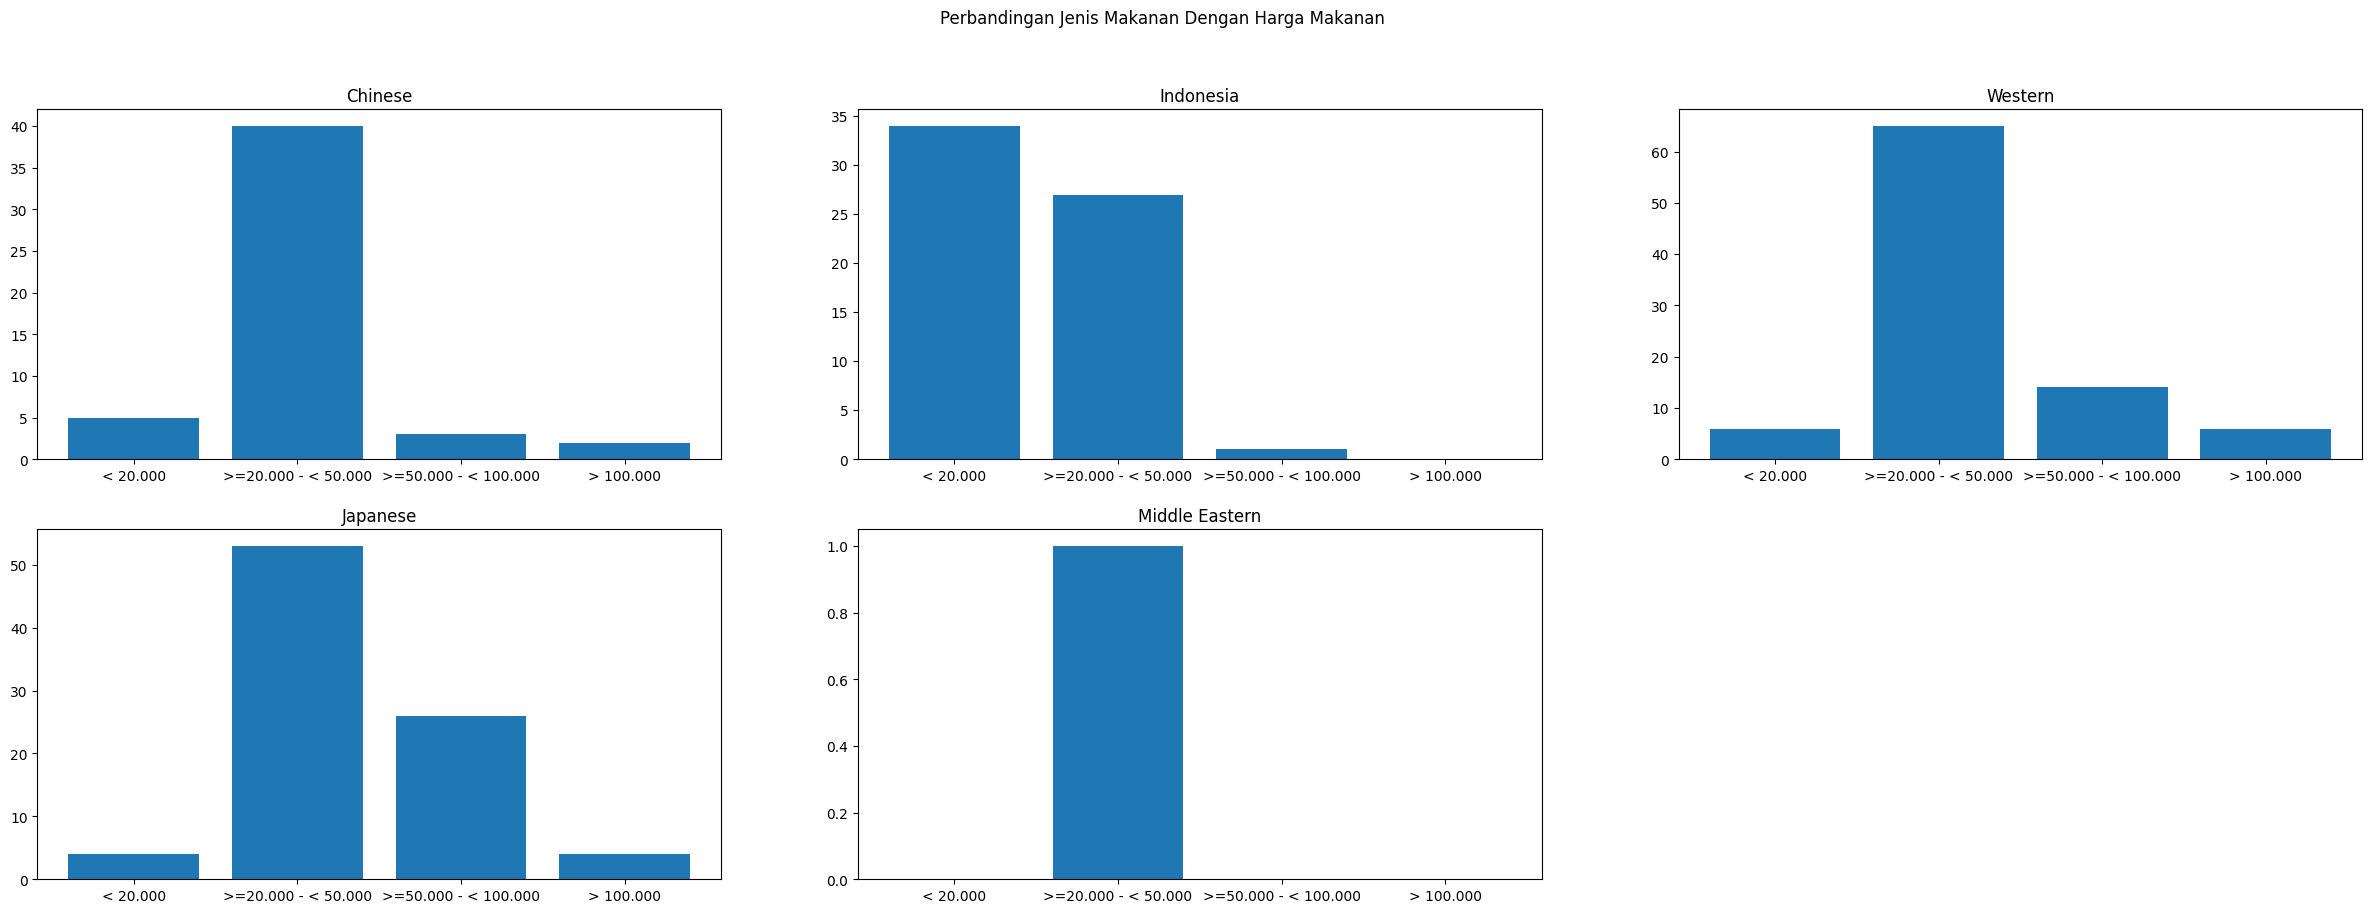

In [107]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
fig.suptitle('Perbandingan Jenis Makanan Dengan Harga Makanan')

# Chinese
under20 = data['Chinese'][0]['under20']
under50 = data['Chinese'][1]['under50']
under100 = data['Chinese'][2]['under100']
over100 = data['Chinese'][3]['over100']
axes[0, 0].bar(['< 20.000', '>=20.000 - < 50.000', '>=50.000 - < 100.000', '> 100.000'], [under20, under50, under100, over100])
axes[0, 0].set_title('Chinese')

# Indonesia
under20 = data['Indonesia'][0]['under20']
under50 = data['Indonesia'][1]['under50']
under100 = data['Indonesia'][2]['under100']
over100 = data['Indonesia'][3]['over100']
axes[0, 1].bar(['< 20.000', '>=20.000 - < 50.000', '>=50.000 - < 100.000', '> 100.000'], [under20, under50, under100, over100])
axes[0, 1].set_title('Indonesia')

# Western
under20 = data['Western'][0]['under20']
under50 = data['Western'][1]['under50']
under100 = data['Western'][2]['under100']
over100 = data['Western'][3]['over100']
axes[0, 2].bar(['< 20.000', '>=20.000 - < 50.000', '>=50.000 - < 100.000', '> 100.000'], [under20, under50, under100, over100])
axes[0, 2].set_title('Western')

# Japanese
under20 = data['Japanese'][0]['under20']
under50 = data['Japanese'][1]['under50']
under100 = data['Japanese'][2]['under100']
over100 = data['Japanese'][3]['over100']
axes[1, 0].bar(['< 20.000', '>=20.000 - < 50.000', '>=50.000 - < 100.000', '> 100.000'], [under20, under50, under100, over100])
axes[1, 0].set_title('Japanese')

# Middle Eastern
under20 = data['Middle Eastern'][0]['under20']
under50 = data['Middle Eastern'][1]['under50']
under100 = data['Middle Eastern'][2]['under100']
over100 = data['Middle Eastern'][3]['over100']
axes[1, 1].bar(['< 20.000', '>=20.000 - < 50.000', '>=50.000 - < 100.000', '> 100.000'], [under20, under50, under100, over100])
axes[1, 1].set_title('Middle Eastern')

axes[1, 2].axis('off')
plt.show()


### Raw

In [108]:
data

{'Chinese': [{'under20': 5}, {'under50': 40}, {'under100': 3}, {'over100': 2}],
 'Indonesia': [{'under20': 34},
  {'under50': 27},
  {'under100': 1},
  {'over100': 0}],
 'Western': [{'under20': 6},
  {'under50': 65},
  {'under100': 14},
  {'over100': 6}],
 'Japanese': [{'under20': 4},
  {'under50': 53},
  {'under100': 26},
  {'over100': 4}],
 'Middle Eastern': [{'under20': 0},
  {'under50': 1},
  {'under100': 0},
  {'over100': 0}]}

## Persentase Variasi Makanan

In [109]:
data = {
    "Chinese": {"min": 0,
                "max": 0,
                "mean": 0},
    "Indonesia": {"min": 0,
                  "max": 0,
                  "mean": 0},
    "Western": {"min": 0,
                "max": 0,
                "mean": 0},
    "Japanese": {"min": 0,
                 "max": 0,
                 "mean": 0},
    "Middle Eastern": {"min": 0,
                       "max": 0,
                       "mean": 0}

}

for i in df['Preferensi Makanan'].unique().tolist():
    data[i]['min'] = df[df['Preferensi Makanan'] == i]['Variasi Makanan'].min()
    data[i]['max'] = df[df['Preferensi Makanan'] == i]['Variasi Makanan'].max()
    data[i]['mean'] = df[df['Preferensi Makanan'] == i]['Variasi Makanan'].mean()

In [110]:
data

{'Chinese': {'min': 1, 'max': 4, 'mean': 2.7},
 'Indonesia': {'min': 1, 'max': 4, 'mean': 2.225806451612903},
 'Western': {'min': 1, 'max': 12, 'mean': 2.6483516483516483},
 'Japanese': {'min': 1, 'max': 5, 'mean': 2.6551724137931036},
 'Middle Eastern': {'min': 3, 'max': 3, 'mean': 3.0}}

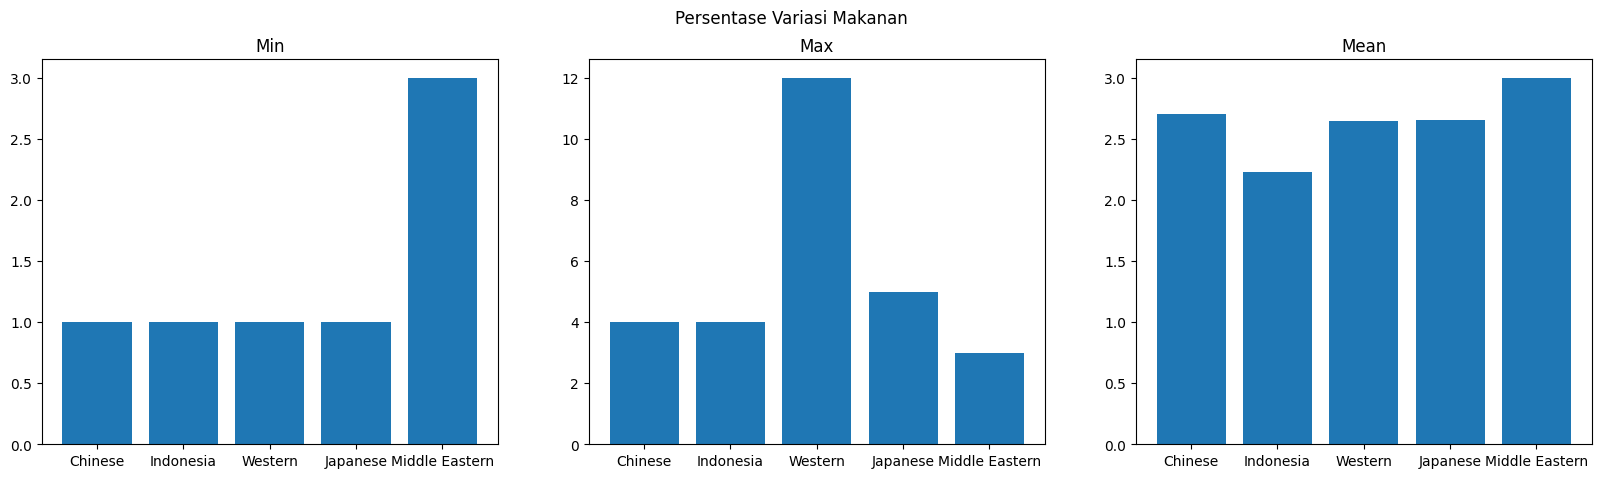

In [111]:
# plot 5 data dengan 2 kolom di setiap baris menggunakan barplot
# jadikan satu menjadi min, max, dan mean
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('Persentase Variasi Makanan')
axes[0].bar(data.keys(), [data['Chinese']['min'], data['Indonesia']['min'], data['Western']['min'],
                          data['Japanese']['min'], data['Middle Eastern']['min']])
axes[0].set_title('Min')
axes[1].bar(data.keys(), [data['Chinese']['max'], data['Indonesia']['max'], data['Western']['max'],
                          data['Japanese']['max'], data['Middle Eastern']['max']])
axes[1].set_title('Max')
axes[2].bar(data.keys(), [data['Chinese']['mean'], data['Indonesia']['mean'], data['Western']['mean'],
                          data['Japanese']['mean'], data['Middle Eastern']['mean']])
axes[2].set_title('Mean')
plt.show()
